## Pandas

### Instructions

This assignment will be done completely inside this Jupyter notebook with answers placed in the cell provided.

All python imports that are needed shown.

Follow all the instructions in this notebook to complete these tasks.    

Make sure the CSV data files is in the same folder as this notebook - alumni.csv, groceries.csv

In [1]:
import pandas as pd


### Question 1 :  Import CSV file (1 Mark)


Write code to load the alumni csv dataset into a Pandas DataFrame called 'alumni'.


In [3]:
import pandas as pd
df = pd.read_csv ('alumni.csv')
print(df)


    Year Graduated  Gender Marital Status          Diploma Type Defaulted  \
0             2004    Male         Single      Standard Diploma       Yes   
1             2005    Male        Married  College Prep Diploma        No   
2             2006  Female         Single      Standard Diploma       Yes   
3             2007    Male        Married      Standard Diploma        No   
4             2006  Female       Divorced      Standard Diploma       Yes   
..             ...     ...            ...                   ...       ...   
83            2007    Male         Single      Standard Diploma        No   
84            2008       M         Single  College Prep Diploma       Yes   
85            2009    Male        Married      Standard Diploma        No   
86            2005  Female       Divorced      Standard Diploma       Yes   
87            2006    Male        Married      Standard Diploma       Yes   

    Salary    Fee Savings ($)  
0   125000  10869     $86,000  
1   100000 

### Question 2 :  Understand the data set (5 Marks)

Use the following pandas commands to understand the data set: a) head, b) tail, c) dtypes, d) info, e) describe 

In [8]:
#a) (1)
df.head()

,Year Graduated,Gender,Marital Status,Diploma Type,Defaulted,Salary,Fee,Savings ($)
0,2004,Male,Single,Standard Diploma,Yes,125000,10869,"$86,000"
1,2005,Male,Married,College Prep Diploma,No,100000,10869,"$116,000"
2,2006,Female,Single,Standard Diploma,Yes,70000,10869,"$52,000"
3,2007,Male,Married,Standard Diploma,No,120000,10869,"$76,000"
4,2006,Female,Divorced,Standard Diploma,Yes,95000,11948,"$52,000"


In [9]:
#b) (1)
df.tail()


,Year Graduated,Gender,Marital Status,Diploma Type,Defaulted,Salary,Fee,Savings ($)
83,2007,Male,Single,Standard Diploma,No,75000,12066,"$16,000"
84,2008,M,Single,College Prep Diploma,Yes,65000,12066,"$72,000"
85,2009,Male,Married,Standard Diploma,No,75000,12066,"$46,000"
86,2005,Female,Divorced,Standard Diploma,Yes,100000,12067,"$32,000"
87,2006,Male,Married,Standard Diploma,Yes,75000,12067,"$67,000"


In [10]:
#c) (1)
print(df.dtypes)


Year Graduated     int64
Gender            object
Marital Status    object
Diploma Type      object
Defaulted         object
Salary             int64
Fee                int64
Savings ($)       object
dtype: object


In [11]:
#d) (1)

df = pd.read_csv ('alumni.csv')



In [10]:
#e) (1)
import pandas as pd
df = pd.read_csv ('alumni.csv')
df.describe()


,Year Graduated,Salary,Fee
count,88.000000,88.000000,88.000000
mean,2006.477273,84090.909091,11708.727273
std,1.560852,21234.128008,1110.647949
min,2004.000000,35000.000000,10869.000000
25%,2005.000000,75000.000000,10968.000000
50%,2006.500000,75000.000000,11696.000000
75%,2008.000000,90000.000000,12058.250000
max,2009.000000,160000.000000,20960.000000


### Question 3 :  Cleaning the data set - part A (3 Marks)

a) Use clean_currency method below to strip out commas and dollar signs from Savings ($) column and put into a new column called 'Savings'.

In [15]:
df.columns

Index(['Year Graduated', 'Gender', 'Marital Status', 'Diploma Type',
       'Defaulted', 'Salary', 'Fee', 'Savings ($)'],
      dtype='object')

In [13]:
def clean_currency(curr):
    return float(curr.replace(",", "").replace("$", ""))

clean_currency("$66,000")

df['Savings']=[clean_currency(i) for i in df['Savings ($)']]

 

In [24]:
df

,Year Graduated,Gender,Marital Status,Diploma Type,Defaulted,Salary,Fee,Savings ($),Savings
0,2004,Male,Single,Standard Diploma,Yes,125000,10869,"$86,000",86000.0
1,2005,Male,Married,College Prep Diploma,No,100000,10869,"$116,000",116000.0
2,2006,Female,Single,Standard Diploma,Yes,70000,10869,"$52,000",52000.0
3,2007,Male,Married,Standard Diploma,No,120000,10869,"$76,000",76000.0
4,2006,Female,Divorced,Standard Diploma,Yes,95000,11948,"$52,000",52000.0
...,...,...,...,...,...,...,...,...,...
83,2007,Male,Single,Standard Diploma,No,75000,12066,"$16,000",16000.0
84,2008,M,Single,College Prep Diploma,Yes,65000,12066,"$72,000",72000.0
85,2009,Male,Married,Standard Diploma,No,75000,12066,"$46,000",46000.0
86,2005,Female,Divorced,Standard Diploma,Yes,100000,12067,"$32,000",32000.0


b) Uncomment 'alumni.dtypes.Savings' to check that the type change has occurred

In [14]:
#b) (1)
df.dtypes



Year Graduated      int64
Gender             object
Marital Status     object
Diploma Type       object
Defaulted          object
Salary              int64
Fee                 int64
Savings ($)        object
Savings           float64
dtype: object

### Question 4 :  Cleaning the data set - part B (5 Marks)

a) Run the 'alumni["Gender"].value_counts()' to see the incorrect 'M' fields that need to be converted to 'Male'

In [15]:
# a) (1)
df["Gender"].value_counts()


Male      46
Female    39
M          3
Name: Gender, dtype: int64

b) Now use a '.str.replace' on the 'Gender' column to covert the incorrect 'M' fields. Hint: We must use ^...$ to restrict the pattern to match the whole string. 

In [16]:
# b) (1)
df[df['Gender'] == 'M'].replace(to_replace=r'^M.$', value='Male', regex=True)

,Year Graduated,Gender,Marital Status,Diploma Type,Defaulted,Salary,Fee,Savings ($),Savings
28,2007,M,Married,Standard Diploma,Yes,75000,11326,"$46,000",46000.0
35,2008,M,Single,Standard Diploma,Yes,65000,12058,"$26,000",26000.0
84,2008,M,Single,College Prep Diploma,Yes,65000,12066,"$72,000",72000.0


In [17]:
# b) (1)
df["Gender"].value_counts()


Male      46
Female    39
M          3
Name: Gender, dtype: int64

c) That didn't the set alumni["Gender"] column however. You will need to update the column when using the replace command 'alumni["Gender"]=<replace command>', show how this is done below

In [14]:
# c) (1)


d) You can set it directly by using the df.loc command, show how this can be done by using the 'df.loc[row_indexer,col_indexer] = value' command to convert the 'M' to 'Male'

In [31]:
# d) (1)
df.loc[row_indexer,col_indexer] = 'M'

NameError: name 'row_indexer' is not defined

e) Now run the 'value_counts' for Gender again to see the correct columns - 'Male' and 'Female' 

In [16]:
# e) (1)


### Question 5 :  Working with the data set (4)

a) get the median, b) mean and c) standard deviation for the 'Salary' column

In [19]:
# a)(1)
print(df.median())


Year Graduated     2006.5
Salary            75000.0
Fee               11696.0
Savings           46000.0
dtype: float64


In [20]:
# b)(1)
print(df.mean()) 


Year Graduated     2006.477273
Salary            84090.909091
Fee               11708.727273
Savings           47954.545455
dtype: float64


In [21]:
# c)(1)
df.std(axis = 1, skipna = True) 


0     59479.327346
1     59110.992258
2     32549.156624
3     55948.986783
4     42423.386675
          ...     
83    33017.836456
84    35836.583036
85    33313.213248
86    44118.685452
87    37300.318107
Length: 88, dtype: float64

d) identify which alumni paid more than $15000 in fees, using the 'Fee' column

In [22]:
# d) (1)
df.loc[df['Fee'] > 15000]

,Year Graduated,Gender,Marital Status,Diploma Type,Defaulted,Salary,Fee,Savings ($),Savings
18,2006,Male,Married,Standard Diploma,No,140000,20960,"$72,000",72000.0


### Question 6 :  Visualise the data set (4 Marks)

a) Using the 'Diploma Type' column, plot a bar chart and show its value counts.

<AxesSubplot:>

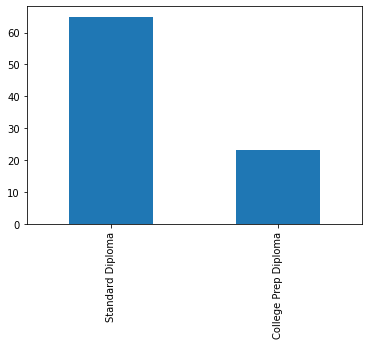

In [23]:
#a) (1)
import matplotlib.pyplot as plt
df['Diploma Type'].value_counts(sort=True).nlargest(5).plot.bar()


b) Now create a box plot comparison between 'Savings' and 'Salary' columns

<AxesSubplot:>

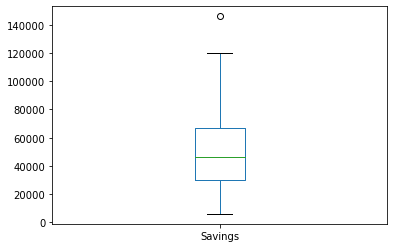

In [24]:
#b) (1)
df.plot(x="Salary", y="Savings", kind="box")


c) Generate a histogram with the 'Salary' column and use 12 bins.

array([[<AxesSubplot:title={'center':'Salary'}>]], dtype=object)

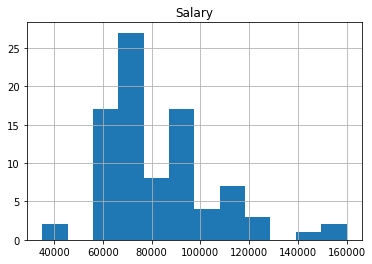

In [25]:
#c) (1)
df.hist(column='Salary', bins =12)


d) Generate a scatter plot comparing 'Salary' and 'Savings' columns.

<AxesSubplot:xlabel='Salary', ylabel='Savings'>

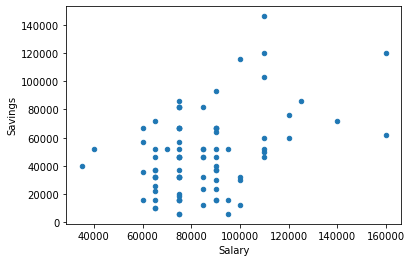

In [26]:
#d) (1)
df.plot(x="Salary", y="Savings", kind="scatter")


### Question 7 :  Contingency Table (2 Marks)

Using both the 'Martial Status' and 'Defaulted' create a contingency table. Hint: crosstab

In [27]:
# Q7 (2)
c_t = pd.crosstab(df['Marital Status'],df['Defaulted'],margins = False)
print(c_t)


Defaulted       No  Yes
Marital Status         
Divorced         8   11
Married         19   16
Single           9   25
